# Part I

>Predicition for happiness score

> Add blockquote


>>Dania alsahfy

```
Dataset called 2019 World Happiness its contained 156 Instances and 9 features.
Brief description: Data on global happiness, including factors like GDP, social support, and life expectancy.
Use: Clean and process data, explore correlations between happiness and other variables, and create visualizations
to compare happiness across countries.

The source: ( https://www.kaggle.com/datasets/unsdsn/world-happiness/data ).


DataSet Description
*   Country or region: Name of the country
*   Overall rank: Rank of the country based on the Happiness Score
*   Score: Happiness Score
*   GDP per capita: The extent to which GDP contributes to the calculation of the Happiness Scor
*   Social support: The extent to which Family contributes to the calculation of the Happiness Score
*   Healthy life expectancy: The extent to which Life expectancy contributed to the calculation of the Happiness Score
*   Freedom to make life choices: The extent to which Freedom contributed to the calculation of the Happiness Score.
*   Generosity
*   Perceptions of corruption: The extent to which Perception of Corruption contributes to Happiness Score.

```

## 1- Data Cleaning

In [ ]:
url = 'https://filebin.net/l2zmxa6nmz70c6sv/2019.csv'
#Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Read data from CSV file
data = pd.read_csv(url)
data

In [ ]:
#Explore the data
data.head(10)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [ ]:
#The column
data.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [ ]:
#Check the null (missing values)
data.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

```
# No missing valuse
```

In [ ]:
#Check for duplicate rows
data.duplicated().sum()

0

In [ ]:
#Check for outliers (Five point summury)
data.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


```
# No outliers
```


In [ ]:
# Check for inconsistencies
print(data.value_counts())

Overall rank  Country or region    Score  GDP per capita  Social support  Healthy life expectancy  Freedom to make life choices  Generosity  Perceptions of corruption
1             Finland              7.769  1.340           1.587           0.986                    0.596                         0.153       0.393                        1
108           Venezuela            4.707  0.960           1.427           0.805                    0.154                         0.064       0.047                        1
101           Jordan               4.906  0.837           1.225           0.815                    0.383                         0.110       0.130                        1
102           Benin                4.883  0.393           0.437           0.397                    0.349                         0.175       0.082                        1
103           Congo (Brazzaville)  4.812  0.673           0.799           0.508                    0.372                         0.105       0.09

### Correlation Matrix

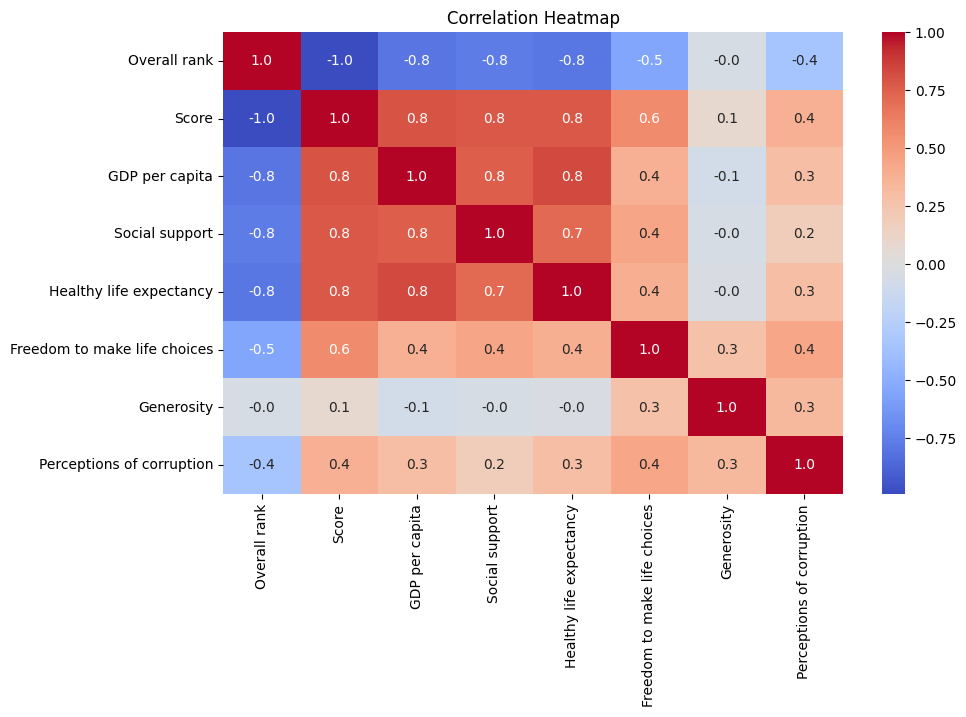

In [ ]:
# -1 to +1
# Heatmap using Seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Correlation Heatmap')
plt.show()




```
`# This is formatted as code`
```

## 2- Data Processing

In [ ]:
#Check data types before Processing
data.dtypes

Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

### Normalization

```
# Normalization is the process of scaling numerical features to have a mean of 0 and a standard deviation of 1.
# This process is done to ensure that the features contribute equally to the analysis.
```

In [ ]:
#Normalization of Float Value Columns
scaler = StandardScaler()
cols_to_normalize = ['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy',
                     'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
scaled_data = scaler.fit(data[cols_to_normalize])
data[cols_to_normalize] = scaler.transform(data[cols_to_normalize])


In [ ]:
#Scaling to a specific range [0, 1] using MinMaxScaler
min_max_scaler = MinMaxScaler()
data[cols_to_normalize] = min_max_scaler.fit_transform(data[cols_to_normalize])

In [ ]:
data.describe() #after normalization

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,0.519548,0.537498,0.744344,0.635621,0.622140,0.326583,0.244156
std,45.177428,0.226428,0.236573,0.184231,0.212203,0.227083,0.168294,0.208693
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,0.344081,0.357928,0.650092,0.480061,0.488114,0.192138,0.103753
50%,78.500000,0.513934,0.570071,0.782943,0.691499,0.660856,0.313604,0.188742
75%,117.250000,0.677685,0.731888,0.894397,0.772787,0.803883,0.438604,0.311810
max,156.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,1.000000,0.795724,0.977217,0.864154,0.944532,0.270318,0.867550
1,2,Denmark,0.965622,0.821259,0.968596,0.872918,0.938193,0.445230,0.905077
2,3,Norway,0.956265,0.883610,0.974138,0.900964,0.955626,0.478799,0.752759
3,4,Iceland,0.944060,0.819477,1.000000,0.899211,0.936609,0.625442,0.260486
4,5,Netherlands,0.942840,0.828979,0.937192,0.875548,0.882726,0.568905,0.657837


**bold text**### Save the cleaned dataset


In [ ]:
# Save the cleaned dataset to the new CSV file.
data.to_csv('cleaned_2019WorldHappiness.csv', index=False)

## 3- Data Visualization

In [ ]:
url = 'https://filebin.net/l2zmxa6nmz70c6sv/cleaned_2019WorldHappiness.csv'
df = pd.read_csv(url)
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,1.000000,0.795724,0.977217,0.864154,0.944532,0.270318,0.867550
1,2,Denmark,0.965622,0.821259,0.968596,0.872918,0.938193,0.445230,0.905077
2,3,Norway,0.956265,0.883610,0.974138,0.900964,0.955626,0.478799,0.752759
3,4,Iceland,0.944060,0.819477,1.000000,0.899211,0.936609,0.625442,0.260486
4,5,Netherlands,0.942840,0.828979,0.937192,0.875548,0.882726,0.568905,0.657837


### Boxplot

In [ ]:
df.dtypes

Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

In [ ]:
#rename columns
df.rename(columns={'Country or region':'Country', 'Score': 'Happiness Score'}, inplace=True)
df.head()# check

,Overall rank,Country,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,1.000000,0.795724,0.977217,0.864154,0.944532,0.270318,0.867550
1,2,Denmark,0.965622,0.821259,0.968596,0.872918,0.938193,0.445230,0.905077
2,3,Norway,0.956265,0.883610,0.974138,0.900964,0.955626,0.478799,0.752759
3,4,Iceland,0.944060,0.819477,1.000000,0.899211,0.936609,0.625442,0.260486
4,5,Netherlands,0.942840,0.828979,0.937192,0.875548,0.882726,0.568905,0.657837


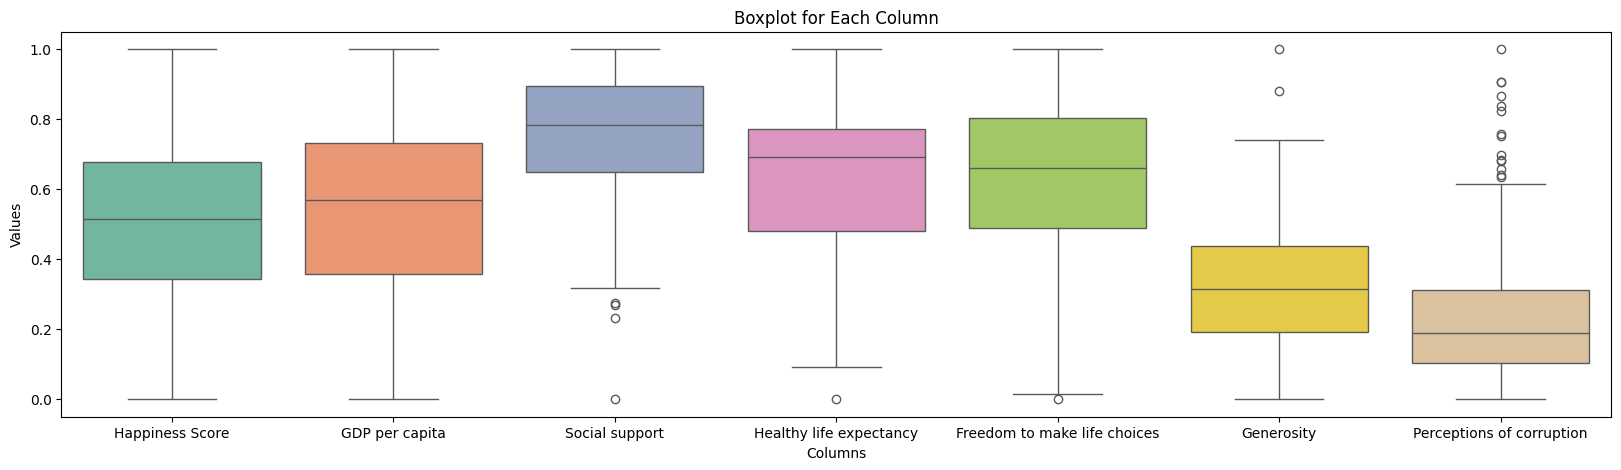

In [ ]:
#Set the matplotlib
plt.figure(figsize=(20, 5))

# Create a new DataFrame (df_bx) with the same data as the original DataFrame (df)
df_bx = df.copy()

#Create boxplots for each column using seaborn
sns.boxplot(data=df_bx.drop('Overall rank', axis=1), orient='v', palette='Set2')
#Labels and title
plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Boxplot for Each Column')
plt.show()

### Scatterplot

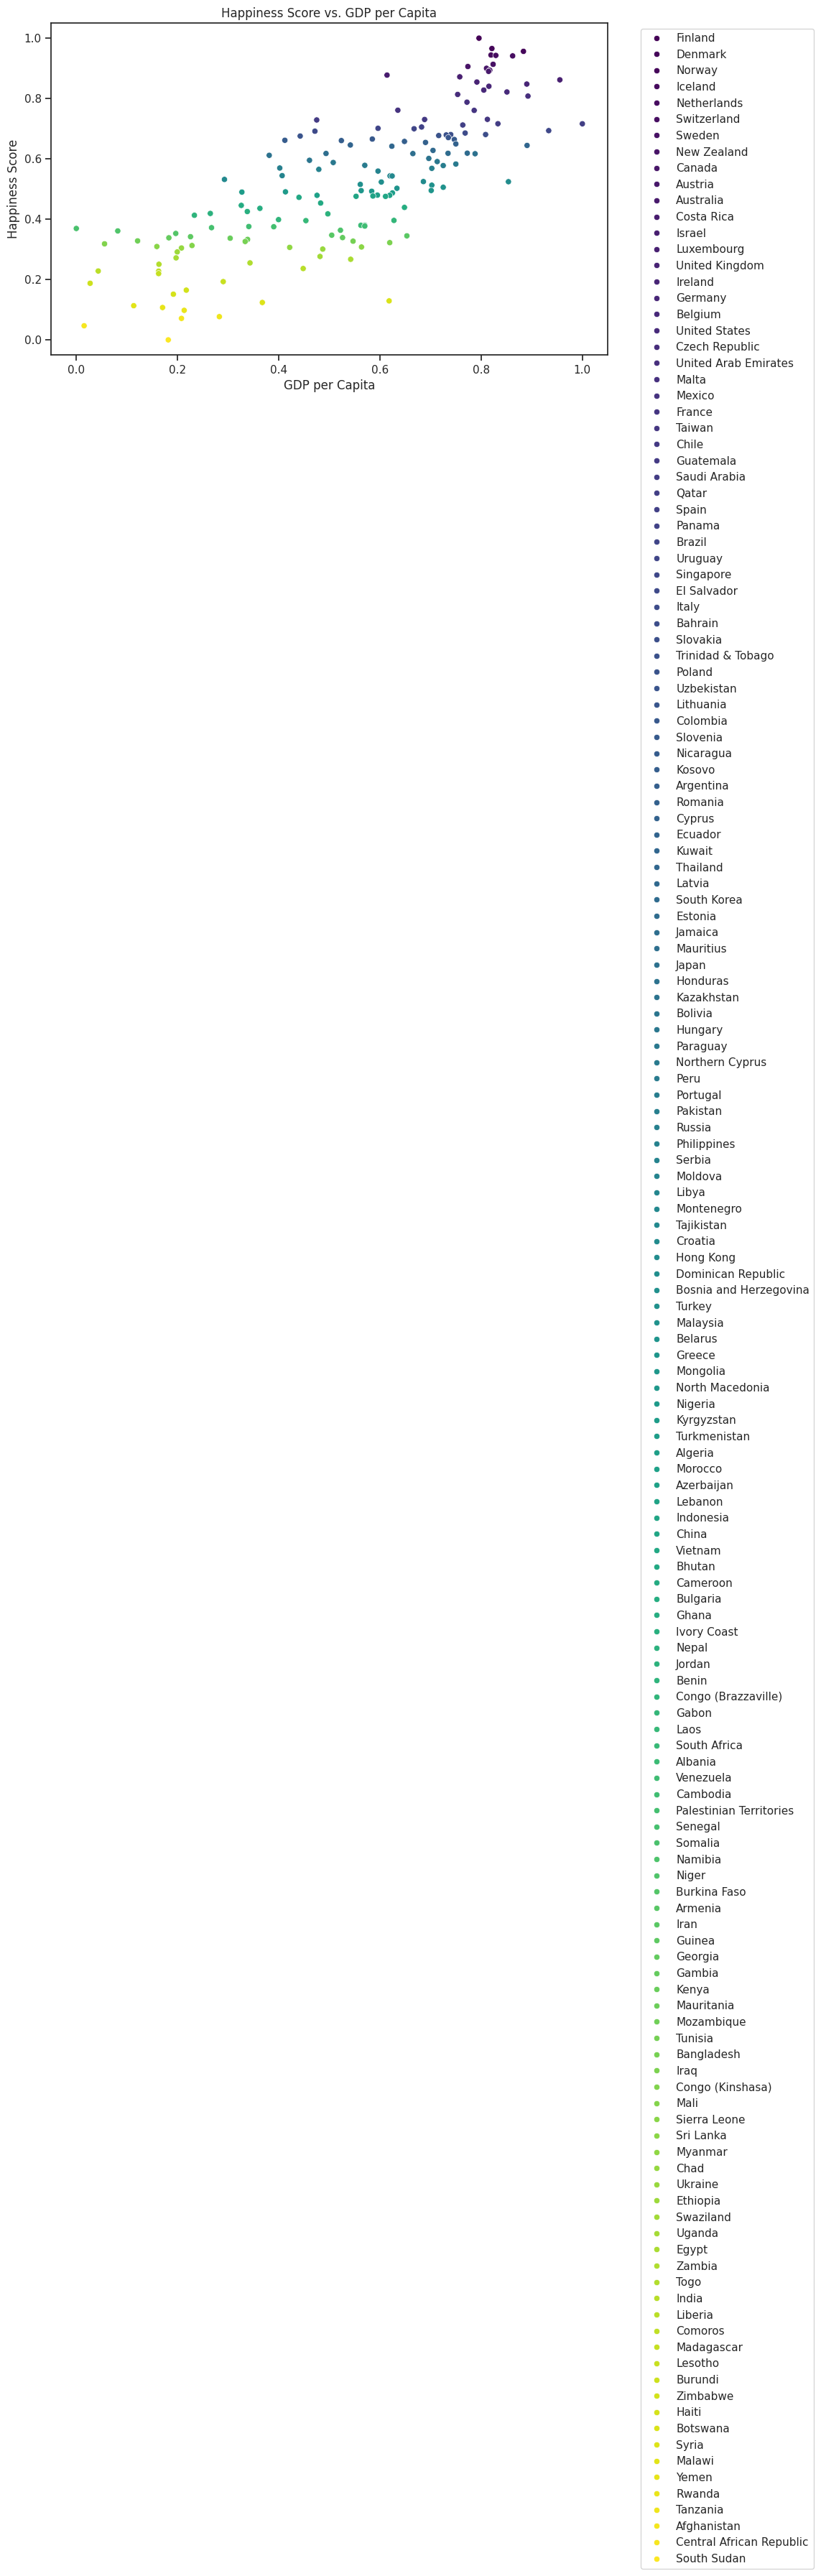

In [ ]:
# Create a scatter plot
sns.set(style="ticks")
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(x='GDP per capita', y='Happiness Score', data=df, hue='Country', palette='viridis')
plt.title('Happiness Score vs. GDP per Capita')
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')

# Adjust the legend position and size
scatter_plot.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

### Top 5 Happiest Countries

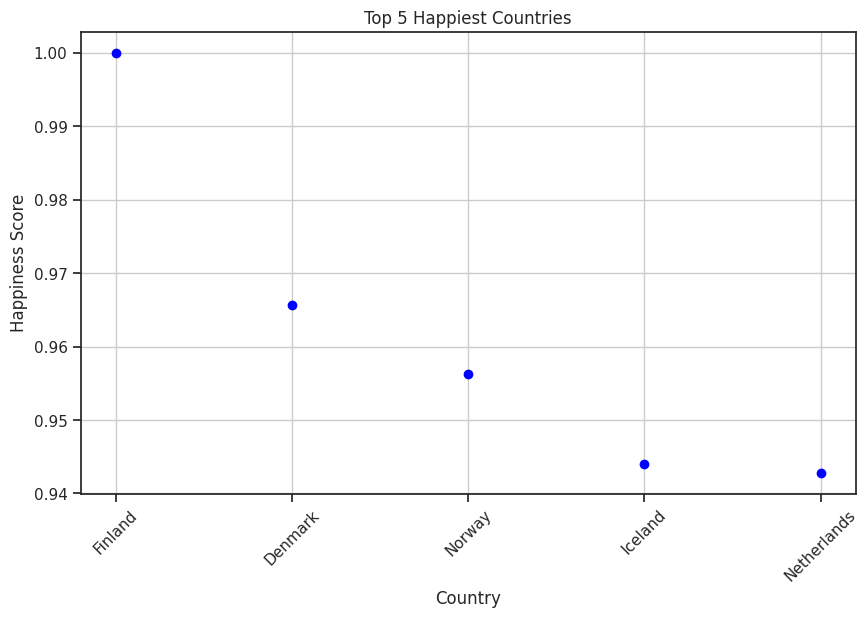

In [ ]:
# Create a new DataFrame (df_t5) with the same data as the original DataFrame (df)
df_t5 = df.copy()
df_t5 = df_t5[['Country', 'Happiness Score']]

# Sort the DataFrame by 'Happiness Score' in descending order
df_t5 = df_t5.sort_values(by='Happiness Score', ascending=False)

# Select the top 5 countries
top_5_countries = df_t5.head(5)

# Create a scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(top_5_countries['Country'], top_5_countries['Happiness Score'], color='blue', marker='o')
plt.title('Top 5 Happiest Countries')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
df.columns

Index(['Overall rank', 'Country', 'Happiness Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

### Histogram

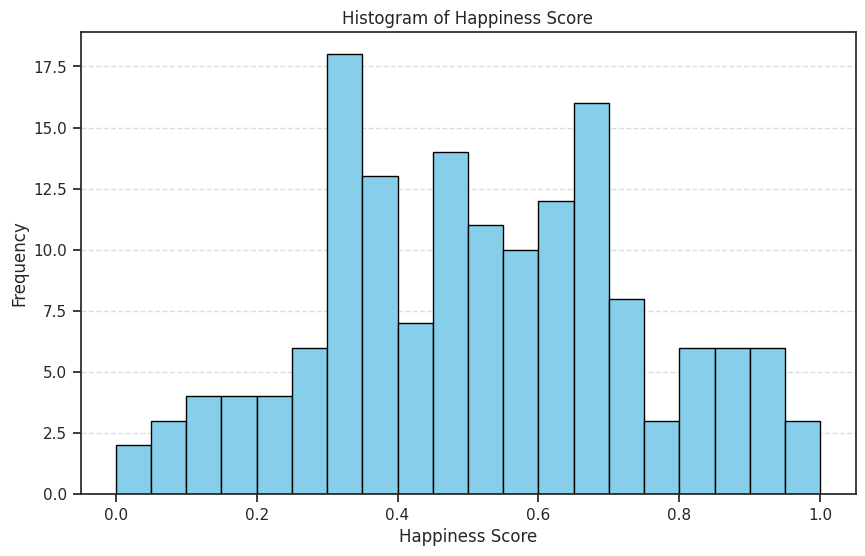

In [ ]:
# Select the column to create a histogram
column_to_plot = 'Happiness Score'

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(df[column_to_plot], bins=20, color='skyblue', edgecolor='black')
plt.title(f'Histogram of {column_to_plot}')
plt.xlabel(column_to_plot)
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Interactive plot using Plotly

In [ ]:
import plotly.express as px
# Interactive plot using Plotly
fig = px.scatter(df, x='GDP per capita', y='Healthy life expectancy', size='Happiness Score', color='Country',
                 hover_name='Country', log_x=True, size_max=60)
fig.update_layout(title='Interactive Scatter Plot: GDP, Life Expectancy, Happiness Score',
                  xaxis_title='GDP (million USD, log scale)',
                  yaxis_title='Life Expectancy',
                  coloraxis_colorbar_title='Country')
fig.show()

### Pairplot for Multiple Comparisons

> Add blockquote



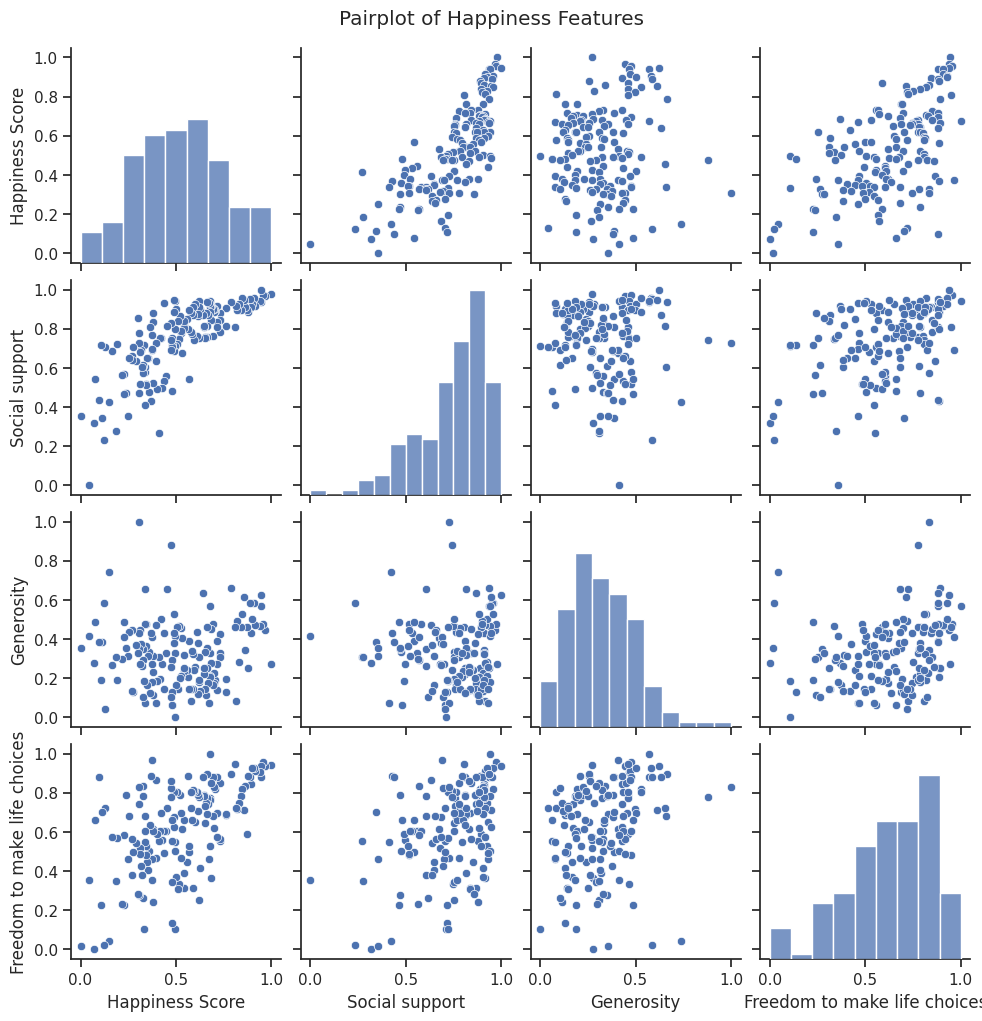

In [ ]:
# Create a pairplot for selected features
features = ['Happiness Score', 'Social support', 'Generosity', 'Freedom to make life choices']
sns.pairplot(df[features])
plt.suptitle('Pairplot of Happiness Features', y=1.02)
plt.show()

In [ ]:
# Rename columns in DataFrames
df.columns = ['Happiness_Rank', 'Country', 'Happiness_Score',
       'GDP_per_capita', 'Family', 'Health',
       'Freedom', 'Generosity','Corruption_perception']
df


,Happiness_Rank,Country,Happiness_Score,GDP_per_capita,Family,Health,Freedom,Generosity,Corruption_perception
0,1,Finland,1.000000,0.795724,0.977217,0.864154,0.944532,0.270318,0.867550
1,2,Denmark,0.965622,0.821259,0.968596,0.872918,0.938193,0.445230,0.905077
2,3,Norway,0.956265,0.883610,0.974138,0.900964,0.955626,0.478799,0.752759
3,4,Iceland,0.944060,0.819477,1.000000,0.899211,0.936609,0.625442,0.260486
4,5,Netherlands,0.942840,0.828979,0.937192,0.875548,0.882726,0.568905,0.657837
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,0.097844,0.213183,0.437808,0.538124,0.879556,0.383392,0.907285
152,153,Tanzania,0.076892,0.282660,0.544951,0.437336,0.660856,0.487633,0.324503
153,154,Afghanistan,0.071196,0.207838,0.318350,0.316389,0.000000,0.279152,0.055188
154,155,Central African Republic,0.046786,0.015439,0.000000,0.092025,0.356577,0.415194,0.077263


**bold text**### Geographic representation of Happiness Score

In [ ]:
import plotly.graph_objs as go
from plotly.offline import iplot

data = dict(type='choropleth',
            locations = df["Country"],
            locationmode = 'country names',
            z = df["Happiness_Score"],
            text = df["Country"],
            colorbar = {"title":"Happiness Score"})

layout = dict(title = "Geographical Visualization of Happiness Score",
              geo = dict(showframe = True, projection = {"type" : "azimuthal equal area"}))

happiness_map = go.Figure(data = [data], layout=layout)
iplot(happiness_map)

*italicized text*## 4- ML Model

### **Problem Statement:** Given above data build a machine learning model that can predict happiness score based on  other features

In [ ]:
df.head()

,Happiness_Rank,Country,Happiness_Score,GDP_per_capita,Family,Health,Freedom,Generosity,Corruption_perception
0,1,Finland,1.000000,0.795724,0.977217,0.864154,0.944532,0.270318,0.867550
1,2,Denmark,0.965622,0.821259,0.968596,0.872918,0.938193,0.445230,0.905077
2,3,Norway,0.956265,0.883610,0.974138,0.900964,0.955626,0.478799,0.752759
3,4,Iceland,0.944060,0.819477,1.000000,0.899211,0.936609,0.625442,0.260486
4,5,Netherlands,0.942840,0.828979,0.937192,0.875548,0.882726,0.568905,0.657837


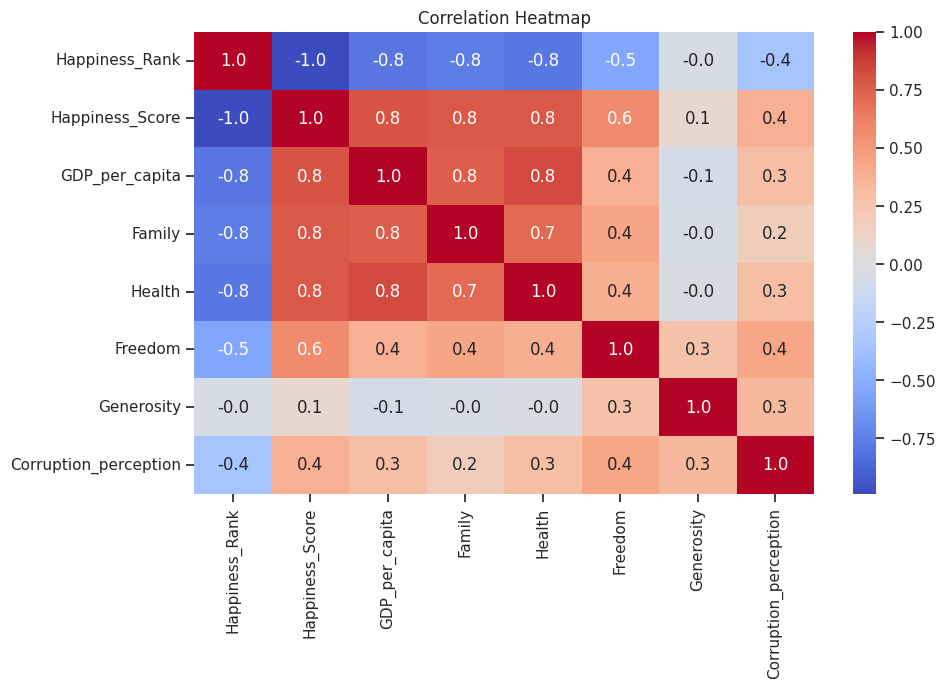

In [ ]:
# -1 to +1
# Heatmap using Seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# The target variable ('Happiness Score')
# Relevant features based on higher absolute correlation:
# => GDP per capita, Family, Health

In [ ]:
df.drop(['Country' , 'Happiness_Rank'] , axis = 1 , inplace = True)

In [ ]:
df.dtypes

Happiness_Score          float64
GDP_per_capita           float64
Family                   float64
Health                   float64
Freedom                  float64
Generosity               float64
Corruption_perception    float64
dtype: object

In [ ]:
y = df['Happiness_Score'] # target
X = df.drop('Happiness_Score' , axis = 1 )
X

,GDP_per_capita,Family,Health,Freedom,Generosity,Corruption_perception
0,0.795724,0.977217,0.864154,0.944532,0.270318,0.867550
1,0.821259,0.968596,0.872918,0.938193,0.445230,0.905077
2,0.883610,0.974138,0.900964,0.955626,0.478799,0.752759
3,0.819477,1.000000,0.899211,0.936609,0.625442,0.260486
4,0.828979,0.937192,0.875548,0.882726,0.568905,0.657837
...,...,...,...,...,...,...
151,0.213183,0.437808,0.538124,0.879556,0.383392,0.907285
152,0.282660,0.544951,0.437336,0.660856,0.487633,0.324503
153,0.207838,0.318350,0.316389,0.000000,0.279152,0.055188
154,0.015439,0.000000,0.092025,0.356577,0.415194,0.077263


italicized text### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2, random_state=42)

# Initialize the Linear Regression model
lr = LinearRegression()

# Train the model
lr.fit(X_train, y_train)

# Make predictions on the test set
predictions = lr.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Absolute Error: 0.10078560270137818
Mean Squared Error: 0.017149963915871053
R-squared: 0.6017537913445685


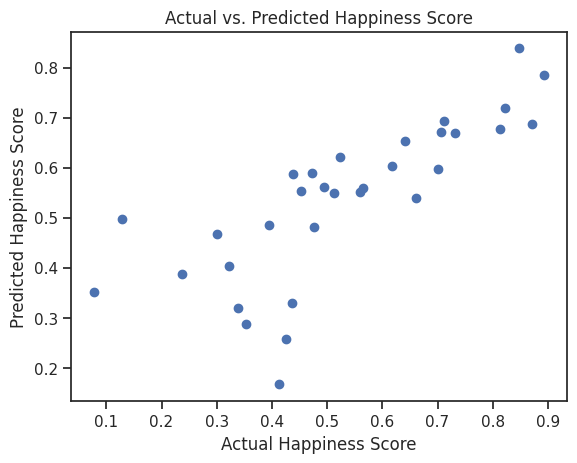

Linear Regression R^2 : 0.6017537913445685


In [ ]:
# Plot the predicted vs. actual values
plt.scatter(y_test, predictions)
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.title('Actual vs. Predicted Happiness Score')
plt.show()
lr.fit(X_train , y_train)
print(f"Linear Regression R^2 : {lr.score(X_test , y_test)}")

*italicized text*### Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor model
RF = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
RF.fit(X_train, y_train)

# Make predictions on the test set
predictions = RF.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 0.0992332434906428
Mean Squared Error: 0.015934227465997514
R-squared: 0.629984896334725


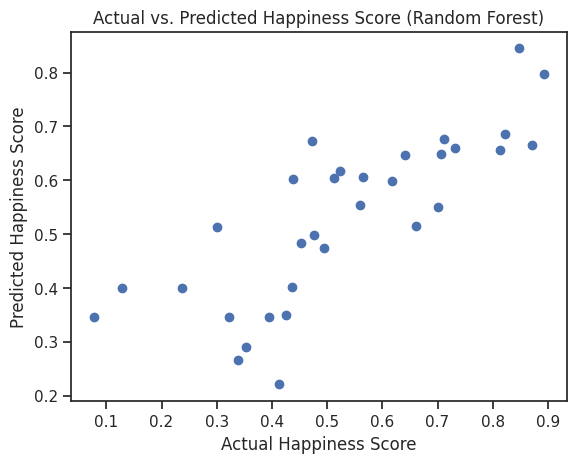

In [ ]:
# Plot the predicted vs. actual values
plt.scatter(y_test, predictions)
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.title('Actual vs. Predicted Happiness Score (Random Forest)')
plt.show()

*italicized text*### Support Vector Regressor (SVR)

In [ ]:
from sklearn.svm import SVR

# Initialize the Support Vector Regressor model
model = SVR(kernel='linear')

# Train the model
model.fit(X_train, y_train)

# Make predictions on the scaled test set
predictions = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')




Mean Absolute Error: 0.10214337706925908
Mean Squared Error: 0.016975552721288575
R-squared: 0.6058038638304504


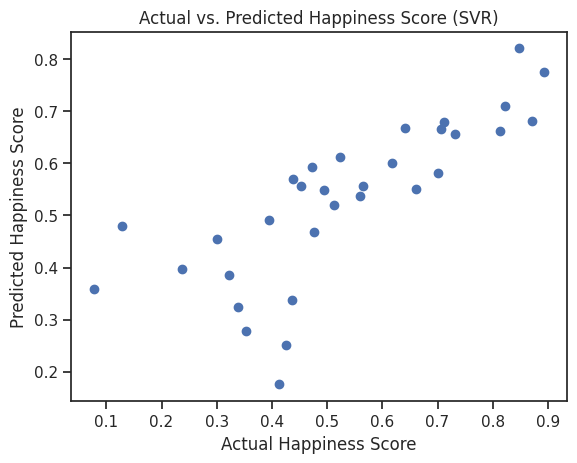

In [ ]:
# Plot the predicted vs. actual values
plt.scatter(y_test, predictions)
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.title('Actual vs. Predicted Happiness Score (SVR)')
plt.show()

In [ ]:
# Getting the model score
lr.score(X_test, y_test)

0.6017537913445685

In [ ]:
RF.score(X_test, y_test)

0.629984896334725

In [ ]:
model.score(X_test, y_test)

0.6058038638304504

*italicized text*## Final result

In [ ]:
model_dic={
    "LinearRegression":LinearRegression(),
    "Support Vector Regressor (SVR)":SVR(),
    "RandomForestRegressor":RandomForestRegressor(),

}
for model_n in model_dic.keys():
    model=model_dic[model_n]
    model.fit(X_train,y_train)
    score=model.score(X_test,y_test)
    print("======")
    print("Model:", model_n)
    print("Score:", score)
    print("train Score:", model.score(X_train,y_train))
    model.predict(X_test)



Model: LinearRegression
Score: 0.6017537913445685
train Score: 0.815179955967481
Model: Support Vector Regressor (SVR)
Score: 0.6441705180455068
train Score: 0.8717385769734467
Model: RandomForestRegressor
Score: 0.6261902159129221
train Score: 0.9751994225117044


# Part II

## solve Q1

1. Loop:
Question:
Write a Python program that uses a 'for' loop to print all even numbers from 1 to 10. Then, use 'while' loop.

In [ ]:
# create function even_num that take 2 parameter from user
# parameter#1 => first number parameter#2 => last number (Range of number)

def even_num(f_num,l_num):

  # Using for loop
  print("Using 'for' loop:")
  for i in range(f_num, l_num + 1):
    if i % 2 == 0 :
      print("The even numbers are: ", i)

  # Using while loop
  num = 1
  print("\nUsing 'while' loop:")
  while num <= l_num:
      if num % 2 == 0:
          print(num)
      num += 1

f_n = int(input("Please enter your first number:(start in range)"))
l_n = int(input("Please enter your last number:(last in range)"))

even_num(f_n, l_n)


## solve Q2

2. Control Flows:
Question:
Create a Python function named grade_classifier that takes a student's score as an argument and returns a string indicating their grade. Use the following criteria:

Score >= 90: "A"
80 <= Score < 90: "B"
70 <= Score < 80: "C"
60 <= Score < 70: "D"
Score < 60: "F"

In [ ]:
# Create function grade_classifier

def grade_classifier(Score):
  if Score >= 90:
      return "A"
  elif 80 <= Score < 90:
      return "B"
  elif 70 <= Score < 80:
      return "C"
  elif 60 <= Score < 70:
      return "D"
  else:
      return "F"

student_score = 80
result = grade_classifier(student_score)
print(f"The student's grade is: {result}")



## solve Q3

3. If Conditions:
Question:
Write a Python program that prompts the user to enter their age. Use if-elif-else statements to categorize and print the user's age group as follows:

If the age is less than 13, print "Child."
If the age is between 13 and 19 (inclusive), print "Teenager."
If the age is between 20 and 59 (inclusive), print "Adult."
If the age is 60 or older, print "Senior Citizen."

In [ ]:
# Create function
def age_classifier(age):
  if age >= 60:
    return "Senior Citizen"
  elif  20 <= age <= 59:
    return "Adult"
  elif  13 <= age <= 19:
    return "Teenager"
  else:
    return "Child"

# Prompt the user to enter their age
age = int(input("Enter your age: "))
result = age_classifier(age)
print(f"The user's age group is: {result}")

## solve Q4

4. Functions:
Question:
Define a Python function named multiply_numbers that takes two parameters (num1 and num2) and returns their product. Test the function with values 5 and 7.
5 * 7 = 35

In [ ]:
# Create function multiply_numbers
def multiply_numbers(num1, num2):
  return num1 * num2

# Test the function with values 5 and 7
multiply_numbers(5, 7)

## solve Q5

5. Combine All the Above:
Question:
Write a Python program that does the following:

Prompts the user to enter a number (user_num).
Uses a loop to print all numbers from 1 to user_num (inclusive) that are divisible by 3.
Calls the grade_classifier function to classify a user's score (you can use a predefined score for testing).
Prints a message indicating whether the classified grade is satisfactory or not.

In [ ]:
# Prompt the user to enter their age
user_num = int(input("Enter a number: "))

# Use a loop to print numbers divisible by 3 from 1 to user_num
print(f"Numbers divisible by 3 from 1 to {user_num}:")
for num in range(1, user_num + 1):
    if num % 3 == 0:
        print(num)

# Call the grade_classifier function with a predefined score for testing
test_score = 98
classified_grade = grade_classifier(test_score)

# Print a message indicating whether the classified grade is satisfactory or not
if classified_grade in ['A', 'B', 'C']:
    print(f"The classified grade ({classified_grade}) is satisfactory.")
else:
    print(f"The classified grade ({classified_grade}) is not satisfactory.")